## Introduction

The telecom operator company Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 

At first we will carry out a preliminary analysis of the plans based on a relatively small client selection. We are given the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The main goal of this analysis is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

Since data are given in five features: users, calls, messages,plans, and internet of these two plans. We will study these 
features of the plan individually, and then we will make final conclusion accordingly.

Then we will find and describe the customers' behavior by finding the minutes, texts, and volume of data the users of each plan
require per month. Finally we will test hypothesis on the average revenue from users of Ultimate and Surf calling plans differs.
The average revenue from users in NY-NJ area is different from that of the users from other regions.

## Loading Data

In [ ]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data files into different DataFrames

try:
    df_call=pd.read_csv("megaline_calls.csv")
    df_message=pd.read_csv("megaline_messages.csv")
    df_internet=pd.read_csv("megaline_internet.csv")
    df_user=pd.read_csv("megaline_users.csv")
    df_plan=pd.read_csv("megaline_plans.csv")
except:
    df_call=pd.read_csv("/datasets/megaline_calls.csv")
    df_message=pd.read_csv("/datasets/megaline_messages.csv")
    df_internet=pd.read_csv("/datasets/megaline_internet.csv")
    df_user=pd.read_csv("/datasets/megaline_users.csv")
    df_plan=pd.read_csv("/datasets/megaline_plans.csv")
    

### Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**<br>
Monthly charge: 20 dollars <br>
500 monthly minutes, 50 texts, and 15 GB of data <br>
After exceeding the package limits:<br>
1 minute: 3 cents <br>
1 text message: 3 cents <br>
1 GB of data: 10 dollars <br>

**Ultimate** <br>
Monthly charge: 70 dollars <br>
3000 monthly minutes, 1000 text messages, and 30 GB of data <br>
After exceeding the package limits:<br>
1 minute: 1 cent <br>
1 text message: 1 cent <br>
1 GB of data: 7 dollars <br>

## Prepare the data

In [6]:
# Print the general/summary information about the plans' DataFrame
df_plan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Print a sample of data for plans
df_plan.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Users

In [8]:
# Print the general/summary information about the users' DataFrame
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Print a sample of data for users
df_user.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:
# change data type
df_user["reg_date"]=pd.to_datetime(df_user["reg_date"])

In [11]:
df_user["churn_date"]=pd.to_datetime(df_user["churn_date"])


In [12]:
# check missing values
df_user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [13]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Since users who were still using the plan have missing data on churn_date column, so this missing values are replaced with currently_using.
Get date and month for date columns

In [14]:
# get churn_month and reg_month from churn_date and reg_date respectively
df_user["month"]=df_user["reg_date"].dt.month
df_user["churn_month"]=df_user["churn_date"].dt.month

## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
df_call.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Call_date column is in object dtype, so change them to date type

In [17]:
# change call_date date type to date type
df_call["call_date"]=pd.to_datetime(df_call["call_date"])

In [18]:
df_call["month"]=df_call["call_date"].dt.month

In [19]:
# round up duration to minutes
def round_up(duration):
    seconds=duration*60
    if seconds%60==0:
        return duration
    return np.ceil(duration)

In [20]:
# apply round up function
df_call["duration"]=df_call["duration"].apply(round_up)

In [21]:
df_call.head(5)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## Messages

In [22]:
# Print the general/summary information about the messages' DataFrame
df_message.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Print a sample of data for messages
df_message.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


message_date is given in object type, so it is changed to date type.

In [24]:
# change the given column to date type
df_message["message_date"]=pd.to_datetime(df_message["message_date"])

### Internet ###

In [25]:
# get month of message_date
df_message["month"]=df_message["message_date"].dt.month

In [26]:
# Print the general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [27]:
# Print a sample of data for the internet traffic
df_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 session_date is given as object type, so change it to date data type.

In [28]:
# change the given column to datetime type
df_internet["session_date"]=pd.to_datetime(df_internet["session_date"])

In [29]:
# Get session month from session date
df_internet["month"]=df_internet["session_date"].dt.month

## Study plan conditions

In [30]:
# Print out the plan conditions and make sure they are clear for you
df_plan.head(5)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


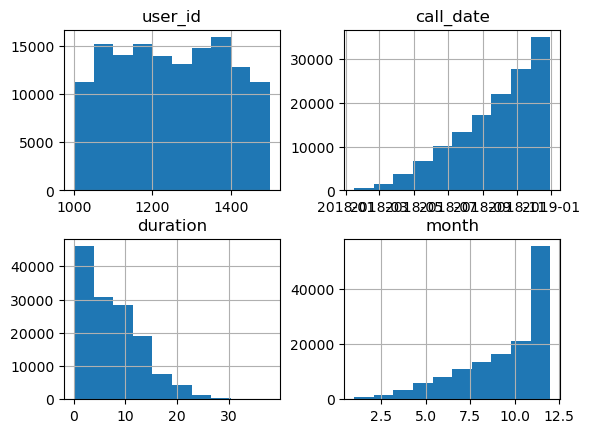

In [110]:
# check data
df_call.hist()
plt.show()

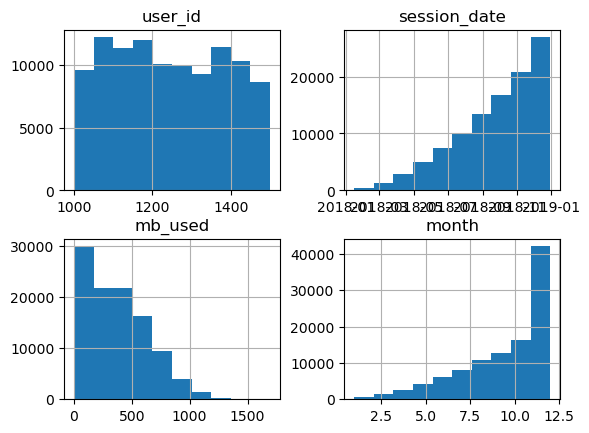

In [32]:
# check internet data
df_internet.hist()
plt.show()

## Aggregate data per user


In [33]:
# Calculate the amount of minutes spent by each user per month. Save the result.

call_per_user_month=df_call.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

In [34]:
# change columns name 
call_per_user_month.rename(columns={"count":"call_count","sum":"total_duration"},inplace=True)

In [35]:
call_per_user_month.columns

Index(['user_id', 'month', 'call_count', 'total_duration'], dtype='object')

In [36]:
# creating avg_call_duration of each user
call_per_user_month["avg_call_duration"]=round(call_per_user_month["total_duration"]/call_per_user_month["call_count"],2)

In [37]:
call_per_user_month.head(5)

,user_id,month,call_count,total_duration,avg_call_duration
0,1000,12,16,124.0,7.75
1,1001,8,27,182.0,6.74
2,1001,9,49,315.0,6.43
3,1001,10,65,393.0,6.05
4,1001,11,64,426.0,6.66


In [38]:
# Calculate the number of messages sent by each user per month. Save the result.
message_by_user_month=df_message.pivot_table(index=("user_id","month"),values="id",aggfunc="count").reset_index()
message_by_user_month.head(5)

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [39]:
# change column names
message_by_user_month.rename(columns={"id":"number_of_messages"},inplace=True)

In [40]:
message_by_user_month

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [41]:
df_internet.head(5)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [42]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
mb_by_user_month=df_internet.pivot_table(index=("user_id","month"),values="mb_used",aggfunc=("count","sum")).reset_index()
mb_by_user_month.head(5)

,user_id,month,count,sum
0,1000,12,5,1901.47
1,1001,8,25,6919.15
2,1001,9,53,13314.82
3,1001,10,56,22330.49
4,1001,11,51,18504.30


In [43]:
# renaming column names
mb_by_user_month.rename(columns={"count":"num_of_session","sum":"total_mb_used"},inplace=True)

In [44]:
# rounding mb
def round_up_mb(mb_used):
    if mb_used%1024==0:
        return mb_used
    return np.ceil(mb_used)

In [45]:
# apply rounding up function for mb_used
mb_by_user_month["total_mb_used"]=mb_by_user_month["total_mb_used"].apply(round_up_mb)

In [46]:
# creating new column average_mb_used
mb_by_user_month["avg_mb_used"]=round(mb_by_user_month["total_mb_used"]/mb_by_user_month["num_of_session"],2)

In [47]:
mb_by_user_month.head(5)

,user_id,month,num_of_session,total_mb_used,avg_mb_used
0,1000,12,5,1902.0,380.40
1,1001,8,25,6920.0,276.80
2,1001,9,53,13315.0,251.23
3,1001,10,56,22331.0,398.77
4,1001,11,51,18505.0,362.84


In [48]:
message_by_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   user_id             1806 non-null   int64
 1   month               1806 non-null   int64
 2   number_of_messages  1806 non-null   int64
dtypes: int64(3)
memory usage: 42.5 KB


In [49]:
call_per_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2258 non-null   int64  
 1   month              2258 non-null   int64  
 2   call_count         2258 non-null   int64  
 3   total_duration     2258 non-null   float64
 4   avg_call_duration  2258 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 88.3 KB


In [50]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_combined =call_per_user_month.merge(message_by_user_month[["user_id","number_of_messages"]],how="left",left_on="user_id",right_on="user_id")


In [51]:
df_combined=df_combined.merge(mb_by_user_month[["user_id","num_of_session","total_mb_used"]],how="left",left_on="user_id",right_on="user_id")

In [52]:
df_user.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'month', 'churn_month'],
      dtype='object')

In [53]:
df_combined=df_combined.merge(df_user[["user_id","first_name","last_name","age","city","reg_date","plan","churn_date",
"churn_month"]],how="left",left_on="user_id",right_on="user_id")

In [54]:
df_combined.head(5)

,user_id,month,call_count,total_duration,avg_call_duration,number_of_messages,num_of_session,total_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn_month
0,1000,12,16,124.0,7.75,11.0,5.0,1902.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,8,27,182.0,6.74,30.0,25.0,6920.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1001,8,27,182.0,6.74,30.0,53.0,13315.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
3,1001,8,27,182.0,6.74,30.0,56.0,22331.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
4,1001,8,27,182.0,6.74,30.0,51.0,18505.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN


In [55]:
# change plan to plan_name
df_combined.rename(columns={"plan":"plan_name"},inplace=True)

In [56]:
df_combined=df_combined.merge(df_plan,on="plan_name")

In [57]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88144 entries, 0 to 88143
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                88144 non-null  int64         
 1   month                  88144 non-null  int64         
 2   call_count             88144 non-null  int64         
 3   total_duration         88144 non-null  float64       
 4   avg_call_duration      88144 non-null  float64       
 5   number_of_messages     84804 non-null  float64       
 6   num_of_session         88080 non-null  float64       
 7   total_mb_used          88080 non-null  float64       
 8   first_name             88144 non-null  object        
 9   last_name              88144 non-null  object        
 10  age                    88144 non-null  int64         
 11  city                   88144 non-null  object        
 12  reg_date               88144 non-null  datetime64[ns]
 13  p

In [58]:
# changing month number to month name
import calendar
d = dict(enumerate(calendar.month_abbr))
df_combined['month'] = df_combined['month'].map(d)

In [59]:
# Calculate the monthly revenue for each user
def cal_revenue(row):
    """
    Calculate the revenue for each plan
    """
    (
        total_duration,
        number_of_messages,
        total_mb_used,
        messages_included,
        mb_per_month_included,
        minutes_included,
        usd_monthly_pay,
        usd_per_gb,
        usd_per_message,
        usd_per_minute
    ) = row
    additional_call_cost, additional_session_cost, additional_msg_cost = 0, 0, 0
    if total_duration > minutes_included:
        additional_call_cost = (total_duration - minutes_included) * usd_per_minute
    if total_mb_used > mb_per_month_included:
        additional_session_cost = ((total_mb_used - mb_per_month_included) / 1024) * usd_per_gb
    if number_of_messages > messages_included:
        additional_msg_cost = (number_of_messages - messages_included) * usd_per_message
    return round(usd_monthly_pay + additional_call_cost + additional_session_cost + additional_msg_cost,2)

In [60]:
columns_to_use = ['total_duration', 'number_of_messages', 'total_mb_used',
                'messages_included', 'mb_per_month_included', 'minutes_included',
                'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_combined['cal_revenue'] = df_combined[columns_to_use].apply(cal_revenue, axis=1)

In [61]:
pd.set_option('display.max_columns',None)

In [62]:
 # creating age group function
def age_groups(age):
    if age < 30:
        return '18-29 years'
    if age < 40:
        return '30-39 years'
    if age < 50:
        return '40-49 years'
    if age < 60:
        return '50-59 years'
    return '60+ years'

In [63]:
# creating age_group column
df_combined["age_groups"]=df_combined["age"].apply(age_groups)

In [64]:
df_combined["age_groups"].value_counts(normalize=True)

60+ years      0.267766
18-29 years    0.211245
40-49 years    0.191448
30-39 years    0.181816
50-59 years    0.147724
Name: age_groups, dtype: float64

60 plus group are the top age group to use the plan.

In [65]:
# df of each plan
df_surf=df_combined.query('plan_name=="surf"')
df_ultimate=df_combined.query('plan_name=="ultimate"')

In [66]:
# age group in surf plan
df_surf["age_groups"].value_counts(normalize=True)

60+ years      0.257632
18-29 years    0.229345
40-49 years    0.200367
30-39 years    0.167700
50-59 years    0.144956
Name: age_groups, dtype: float64

In [67]:
# age_group in ultimate plan
df_ultimate["age_groups"].value_counts(normalize=True)

60+ years      0.288662
30-39 years    0.210921
18-29 years    0.173927
40-49 years    0.173058
50-59 years    0.153432
Name: age_groups, dtype: float64

On both plans 60 plus age group have the top age group.
Age group of Surf plan is similar to the overall dataset.

In [68]:
print('Average duration of each user per month in Surf plan is {:.2f} minutes'.format(df_surf["total_duration"].mean()))
print('Average duration of each user per month in Ultimate plan is {:.2f} minutes '.format(df_ultimate["total_duration"].mean()))

Average duration of each user per month in Surf plan is 465.12 minutes
Average duration of each user per month in Ultimate plan is 443.71 minutes 


In [69]:
print('Average number of messages of each user per month in Surf plan is {:.2f} messages'.format(df_surf["number_of_messages"].mean()))
print('Average number of messages of each user per month in Ultimate plan is {:.2f} messages'.format(df_ultimate["number_of_messages"].mean()))

Average number of messages of each user per month in Surf plan is 37.63 messages
Average number of messages of each user per month in Ultimate plan is 45.74 messages


In [70]:
print('Average mb used by each user per month in Surf plan is {:.2f} mb'.format(df_surf["total_mb_used"].mean()))
print('Average mb used by each user per month in Ultimate plan is {:.2f} mb'.format(df_ultimate["total_mb_used"].mean()))

Average mb used by each user per month in Surf plan is 16870.76 mb
Average mb used by each user per month in Ultimate plan is 18620.65 mb


In [71]:
print('Average revenue of each user per month in Surf plan is $ {:.2f}'.format(df_surf["cal_revenue"].mean()))
print('Average revenue of each user per month in Ultimate plan is  ${:.2f}'.format(df_ultimate["cal_revenue"].mean()))

Average revenue of each user per month in Surf plan is $ 56.54
Average revenue of each user per month in Ultimate plan is  $73.04


In [72]:
# splitting city column 
new=df_combined["city"].str.split(",", n = 2, expand = True)

In [73]:
# city_new column is created that contains only city name 
df_combined["city_new"]=new[0]

In [74]:
# df of New York and New Jersy area
df_combined_NY_NJ = df_combined.query('city_new=="New York-Newark-Jersey City"')

In [75]:
# df of areas other than New York and New Jersy
df_combined_Other_Areas = df_combined.query('city_new!="New York-Newark-Jersey City"')

In [76]:
# Revenue of Other areas
df_combined_other_area_revenue=df_combined_Other_Areas["cal_revenue"]

In [77]:
# revenue of NY NJ
df_combined_NY_NJ_revenue=df_combined_NY_NJ["cal_revenue"]

## Study user behaviour

### Calls

In [78]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59356 entries, 28788 to 88143
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                59356 non-null  int64         
 1   month                  59356 non-null  object        
 2   call_count             59356 non-null  int64         
 3   total_duration         59356 non-null  float64       
 4   avg_call_duration      59356 non-null  float64       
 5   number_of_messages     56973 non-null  float64       
 6   num_of_session         59292 non-null  float64       
 7   total_mb_used          59292 non-null  float64       
 8   first_name             59356 non-null  object        
 9   last_name              59356 non-null  object        
 10  age                    59356 non-null  int64         
 11  city                   59356 non-null  object        
 12  reg_date               59356 non-null  datetime64[ns]
 1

In [79]:
# average duration for each month
avg_duration_surf=df_surf.groupby("month")["total_duration"].mean()
avg_duration_ultimate=df_ultimate.groupby("month")["total_duration"].mean()

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\3711129508.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1) # row 1, col 2 index 1


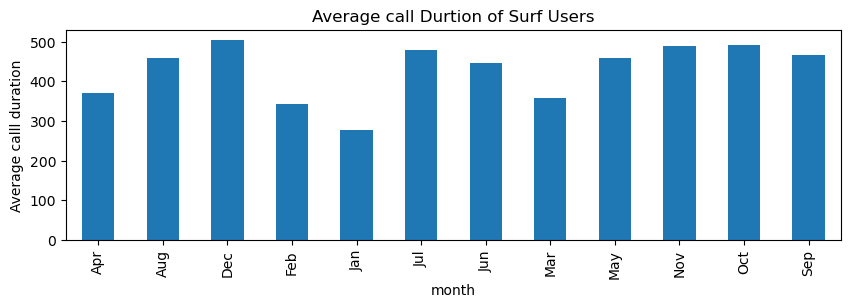

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\3711129508.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2) # index 2


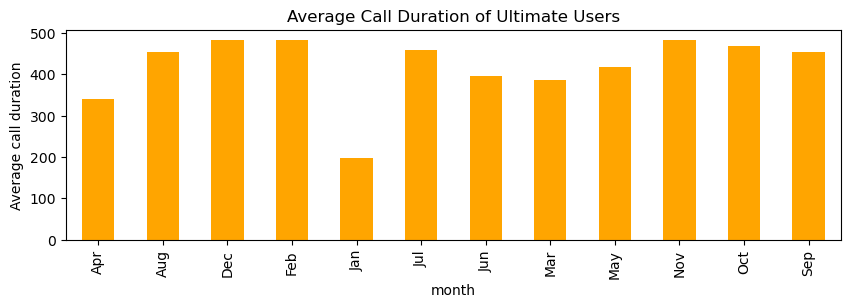

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(2, 1, 1) # row 1, col 2 index 1
avg_duration_surf.plot.bar()
plt.title("Average call Durtion of Surf Users")
plt.xlabel('month')
plt.ylabel('Average calll duration')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(2, 1, 2) # index 2
avg_duration_ultimate.plot.bar(color="orange")
plt.title("Average Call Duration of Ultimate Users")
plt.xlabel('month')
plt.ylabel('Average call duration')
plt.show()

The average call duration of each user per month is similar in Surf and Ultimate plan.

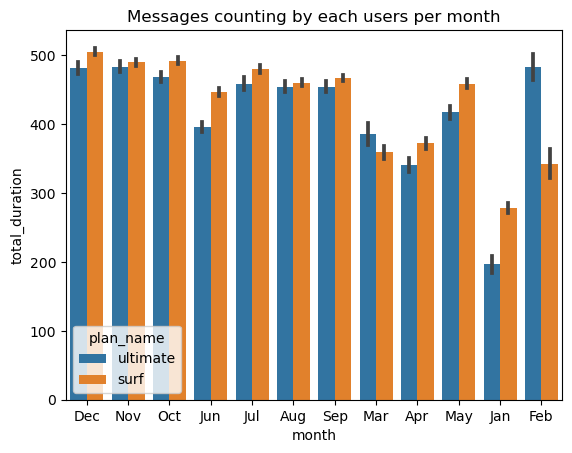

In [81]:
sns.barplot( y = "total_duration", x='month', data = df_combined, hue='plan_name')
plt.title('Messages counting by each users per month')
plt.show()


It shows that in most of the months Surf plan users used more messages than Ultimate plan users.

Surf plan users have longer call duration per month than Ultimate plan users.

In [82]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# getting total minutes for each month
total_minutes_surf=df_surf.groupby("month")["total_duration"].sum()
total_minutes_ultimate=df_ultimate.groupby("month")["total_duration"].sum()

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\2710407392.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1) # row 1, col 2 index 1


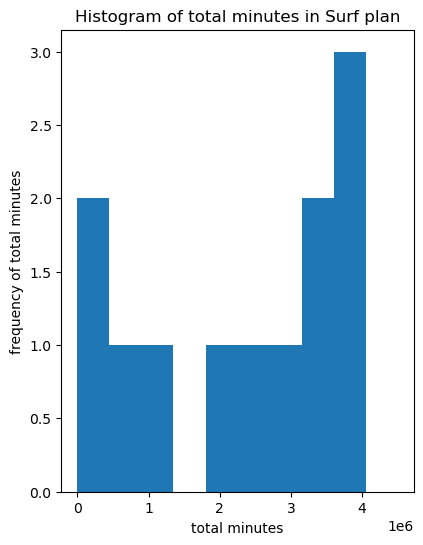

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\2710407392.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2) # index 2


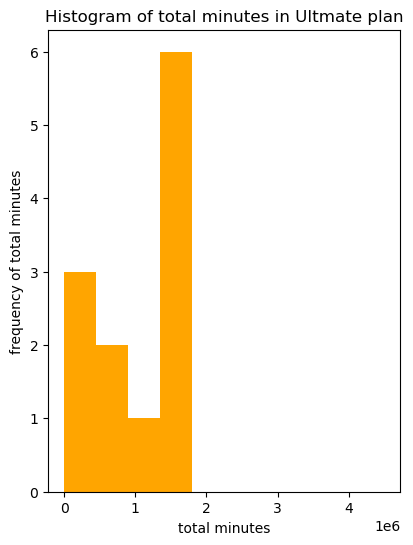

In [83]:
# histogram plot for each plan
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
total_minutes_surf.plot.hist(range=(0,4500000))
plt.title("Histogram of total minutes in Surf plan")
plt.xlabel('total minutes')
plt.ylabel('frequency of total minutes')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(1, 2, 2) # index 2
total_minutes_ultimate.plot.hist(range=(0,4500000),color="orange")
plt.title("Histogram of total minutes in Ultmate plan")
plt.xlabel('total minutes')
plt.ylabel('frequency of total minutes')
plt.show()

Surf plan users used more call minutes than Ultimate plan users.

In [84]:
# variance of the monthly call duration 
variance_monthly_duration_surf=df_surf.groupby("month")["total_duration"].var()
variance_monthly_duration_ultimate=df_ultimate.groupby("month")["total_duration"].var()

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\2471186030.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1) # row 1, col 2 index 1


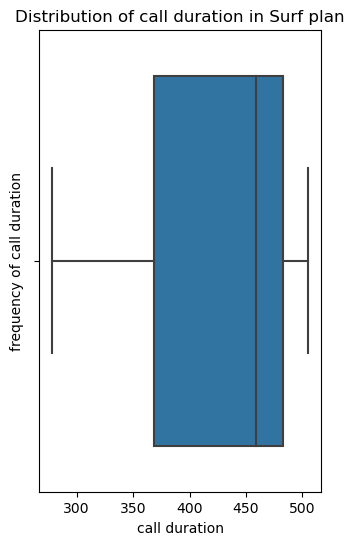

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\2471186030.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2) # index 2


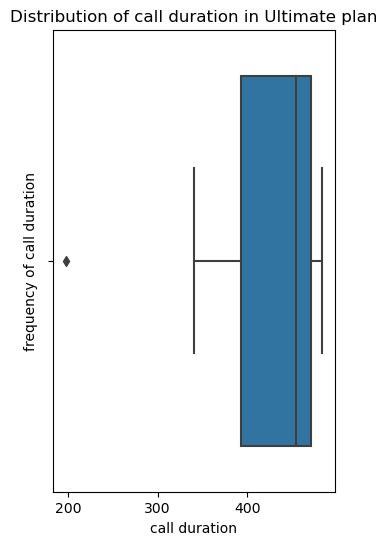

In [85]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.boxplot(x=avg_duration_surf)
plt.title("Distribution of call duration in Surf plan")
plt.xlabel('call duration')
plt.ylabel('frequency of call duration')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
plt.subplot(1, 2, 2) # index 2
sns.boxplot(x=avg_duration_ultimate)
plt.title("Distribution of call duration in Ultimate plan")
plt.xlabel('call duration')
plt.ylabel('frequency of call duration')
plt.show()

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\1106750452.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1) # row 1, col 2 index 1


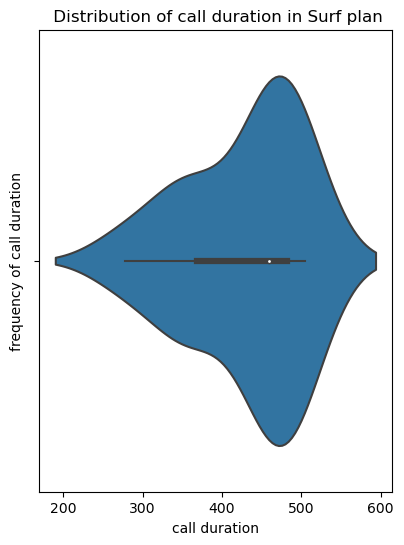

C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\1106750452.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2) # index 2


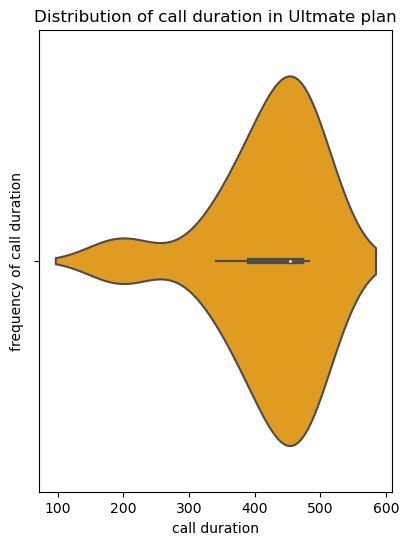

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.violinplot(x=avg_duration_surf)
plt.title(" Distribution of call duration in Surf plan")
plt.xlabel('call duration')
plt.ylabel('frequency of call duration')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(1, 2, 2) # index 2
sns.violinplot(x=avg_duration_ultimate,color="orange")
plt.title("Distribution of call duration in Ultmate plan")
plt.xlabel('call duration')
plt.ylabel('frequency of call duration')
plt.show()

Average call duration per each user per month is mostly concerntrated near 450 minutes. This average call duration is 
widely distributed between 100 minutes to 400 minutes in Surf plan whereas it is narrowly distributed in Ultimate plan.

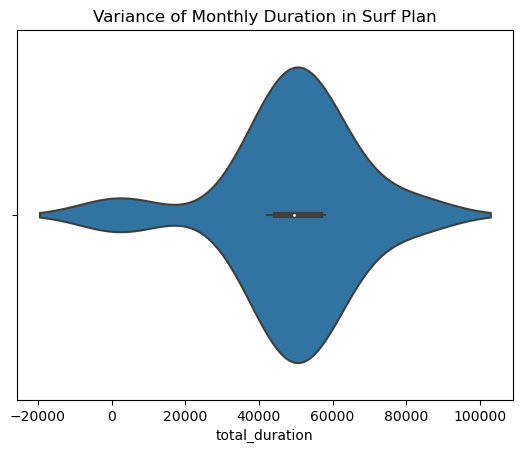

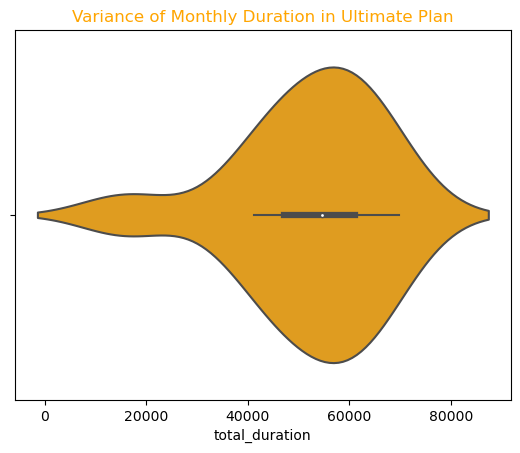

In [87]:
sns.violinplot(x=variance_monthly_duration_surf)
plt.title("Variance of Monthly Duration in Surf Plan")
plt.show()
sns.violinplot(x=variance_monthly_duration_ultimate,color="orange")
plt.title("Variance of Monthly Duration in Ultimate Plan",color="orange")
plt.show()

Call duration time in Surf plan have few values that spread widely than in Ultimate plan. Call duration time around 6000
minutes in Ultimate plan have higher variance than in Surf plan.
It shows that in average Ultimate plan users have longer call duration than Surf plan users.

### Messages

In [88]:
# Compare the number of messages users of each plan tend to send each month
# messages in each plan in each month
avg_messages_month_surf=df_surf.groupby("month")["number_of_messages"].sum()
avg_messages_month_ultimate= df_ultimate.groupby("month")["number_of_messages"].sum()

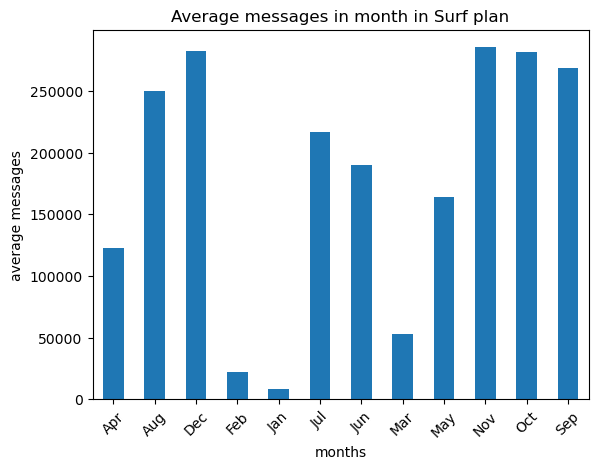

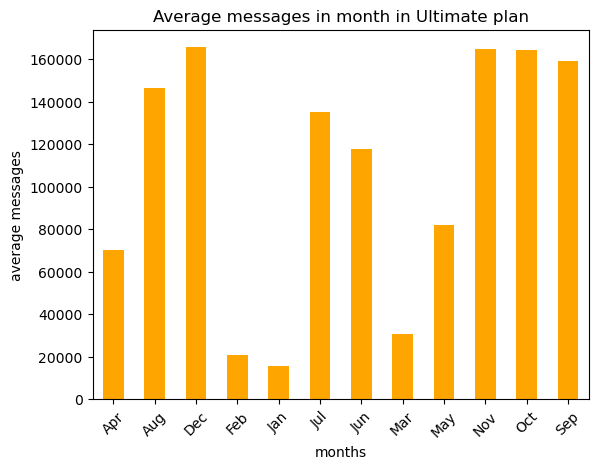

In [89]:
avg_messages_month_surf.plot.bar(rot=45)
plt.title("Average messages in month in Surf plan")
plt.ylabel("average messages")
plt.xlabel("months")
plt.show()
avg_messages_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("Average messages in month in Ultimate plan")
plt.ylabel("average messages")
plt.xlabel("months")
plt.show()

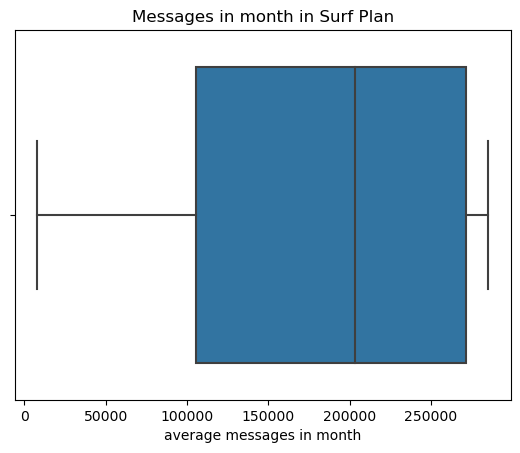

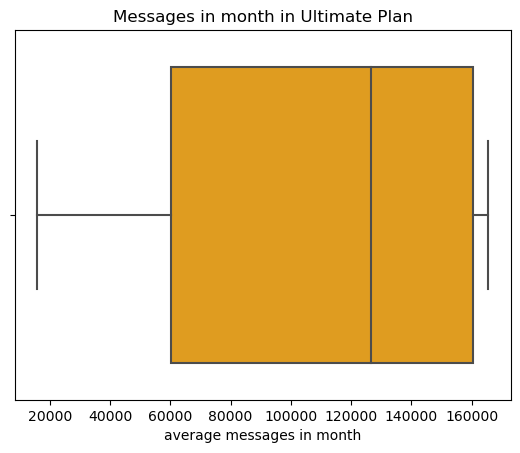

In [90]:
# boxplot of messages in each plan in each month
sns.boxplot(x=avg_messages_month_surf)
plt.title("Messages in month in Surf Plan")
plt.xlabel("average messages in month")
plt.show()
sns.boxplot(x=avg_messages_month_ultimate,color="orange")
plt.title("Messages in month in Ultimate Plan")
plt.xlabel("average messages in month")
plt.show()

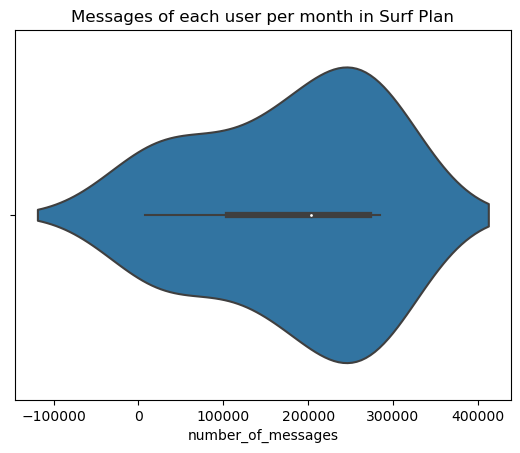

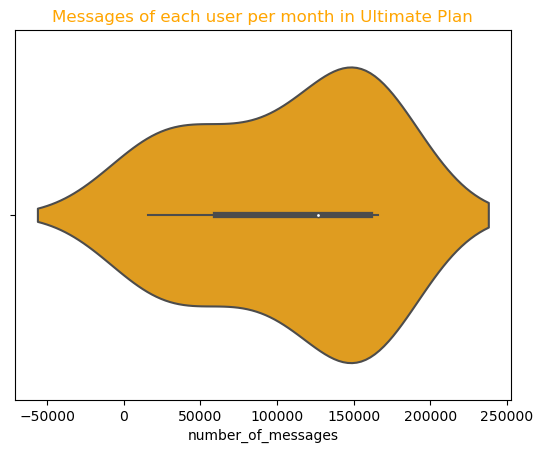

In [91]:
sns.violinplot(x=avg_messages_month_surf)
plt.title("Messages of each user per month in Surf Plan")
plt.show()
sns.violinplot(x=avg_messages_month_ultimate,color="orange")
plt.title("Messages of each user per month in Ultimate Plan",color="orange")
plt.show()

Users from both plans have used messages in similar pattern throughout 2018.
Median average number of messages in each month of Surf plan is higher than that of Ultimate plan.
Surf plan users have wider range in distribution of message usages.

### Internet

In [92]:
# Compare the amount of internet traffic consumed by users per plan

In [93]:
# df of each plan that have mb used in each month
total_mb_month_surf = df_surf.groupby("month")["total_mb_used"].sum()
total_mb_month_ultimate = df_ultimate.groupby("month")["total_mb_used"].sum()

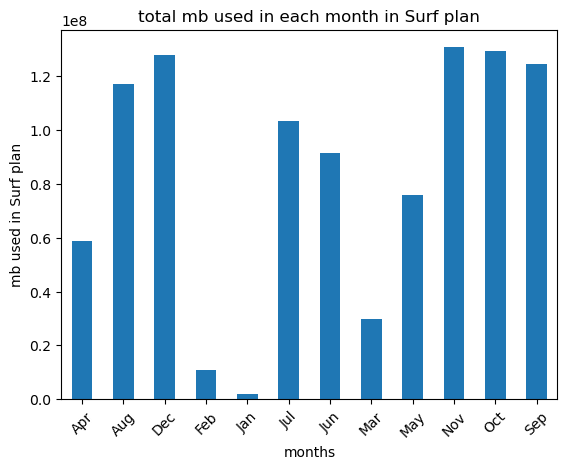

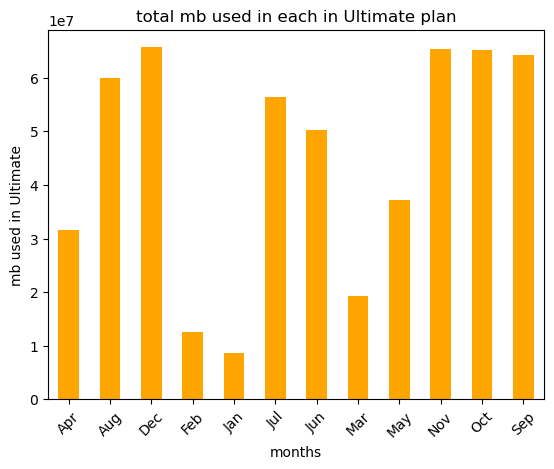

In [94]:
total_mb_month_surf.plot.bar(rot=45)
plt.title("total mb used in each month in Surf plan")
plt.ylabel("mb used in Surf plan")
plt.xlabel("months")
plt.show()
total_mb_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("total mb used in each in Ultimate plan")
plt.ylabel("mb used in Ultimate")
plt.xlabel("months")
plt.show()

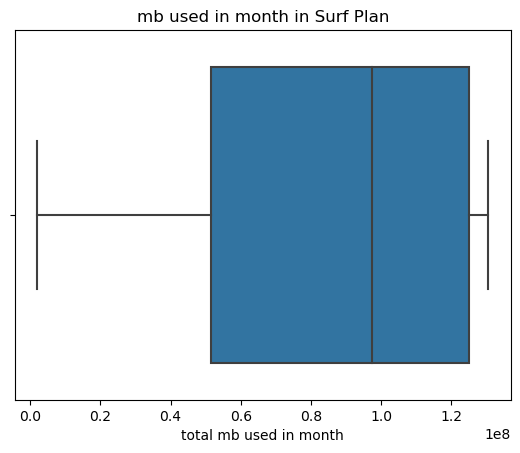

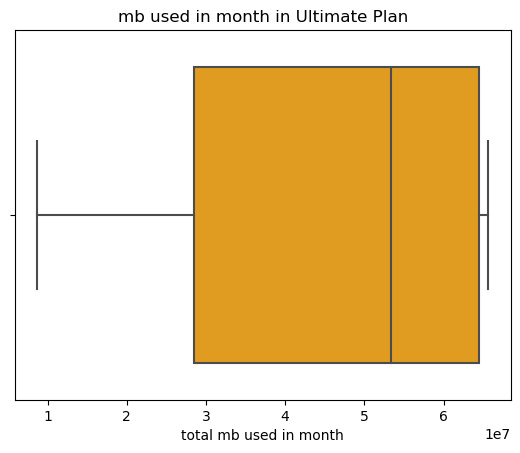

In [95]:
sns.boxplot(x=total_mb_month_surf)
plt.title("mb used in month in Surf Plan")
plt.xlabel("total mb used in month")
plt.show()
sns.boxplot(x=total_mb_month_ultimate,color="orange")
plt.title("mb used in month in Ultimate Plan")
plt.xlabel("total mb used in month")
plt.show()

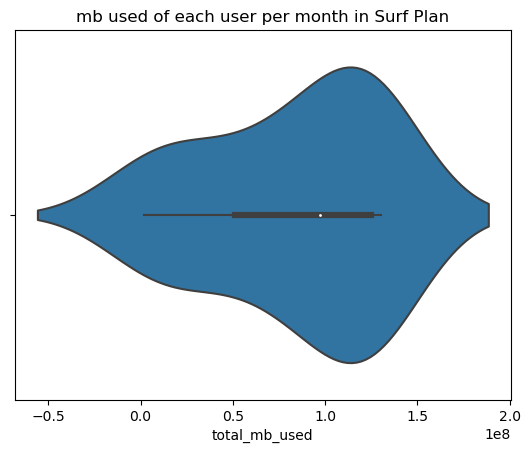

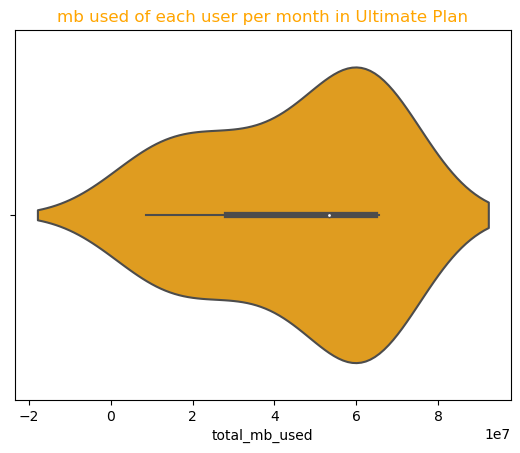

In [96]:
sns.violinplot(x=total_mb_month_surf)
plt.title("mb used of each user per month in Surf Plan")
plt.show()
sns.violinplot(x=total_mb_month_ultimate,color="orange")
plt.title("mb used of each user per month in Ultimate Plan",color="orange")
plt.show()

The pattern of mb used by both plan users are similar in each month in 2018.
Median mb used in each month in Surf plan is higher than in Ultimate plan.
Few users in Surf plan have few extreme lower and higher mb used values.

## Revenue

In [97]:
# df of revenue in each month in each plan
total_revenue_month_surf = df_surf.groupby("month")["cal_revenue"].sum()
total_revenue_month_ultimate = df_ultimate.groupby("month")["cal_revenue"].sum()

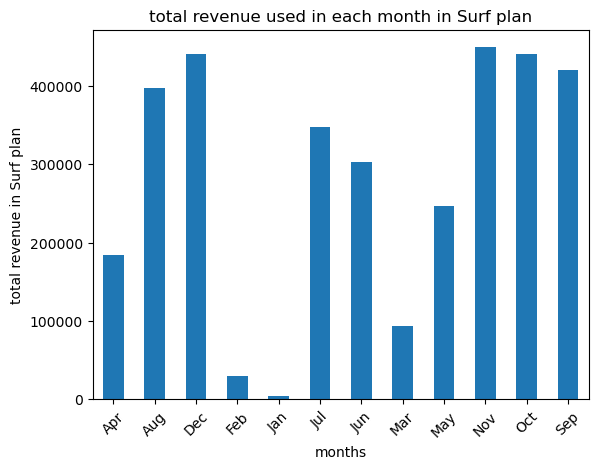

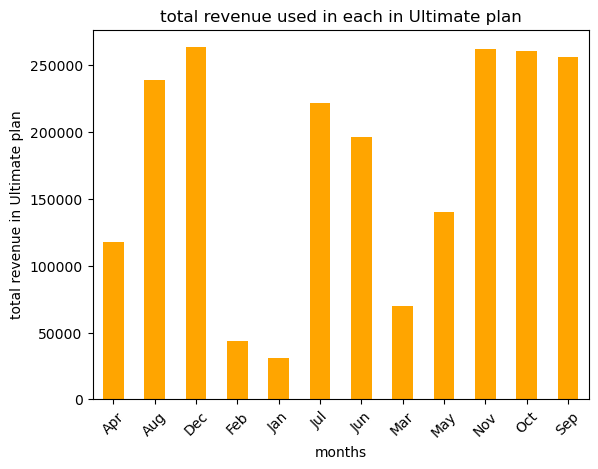

In [98]:
# bar plot of total revenue in each plan
total_revenue_month_surf.plot.bar(rot=45)
plt.title("total revenue used in each month in Surf plan")
plt.ylabel("total revenue in Surf plan")
plt.xlabel("months")
plt.show()
total_revenue_month_ultimate.plot.bar(rot=45,color="orange")
plt.title("total revenue used in each in Ultimate plan")
plt.ylabel("total revenue in Ultimate plan")
plt.xlabel("months")
plt.show()

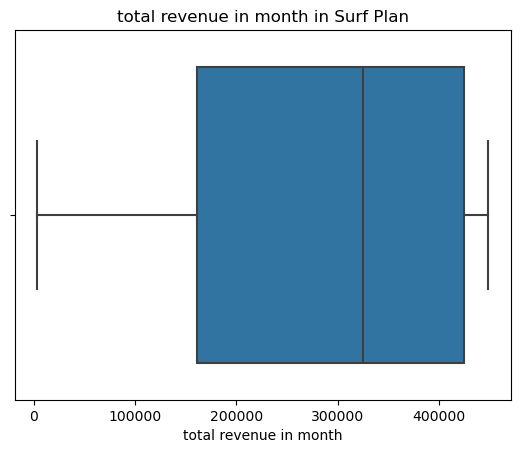

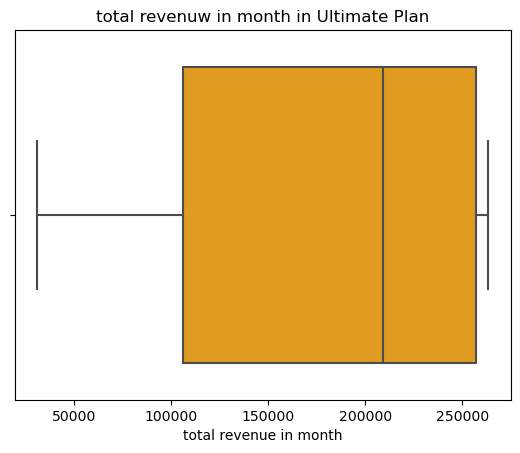

In [99]:
sns.boxplot(x=total_revenue_month_surf)
plt.title("total revenue in month in Surf Plan")
plt.xlabel("total revenue in month")
plt.show()
sns.boxplot(x=total_revenue_month_ultimate,color="orange")
plt.title("total revenuw in month in Ultimate Plan")
plt.xlabel("total revenue in month")
plt.show()

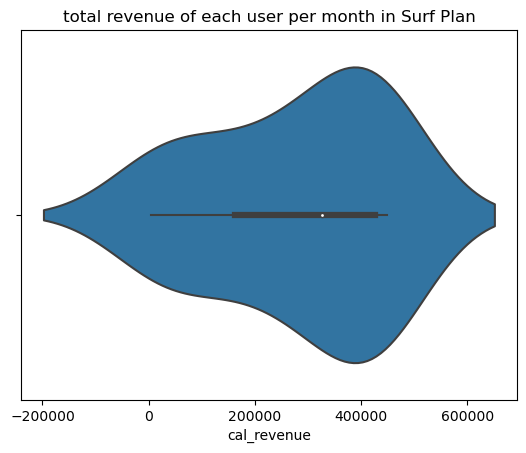

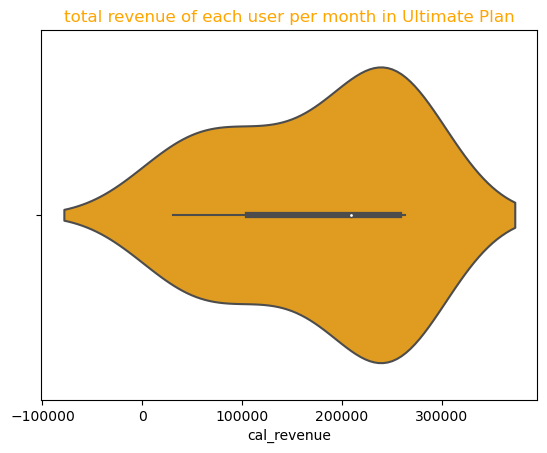

In [100]:
sns.violinplot(x=total_revenue_month_surf)
plt.title("total revenue of each user per month in Surf Plan")
plt.show()
sns.violinplot(x=total_revenue_month_ultimate,color="orange")
plt.title("total revenue of each user per month in Ultimate Plan",color="orange")
plt.show()

More revenue are collected from Surf plan users in 10 months out of 12 months. 
Total revenue of each month in Surf plan have higher median than in ultimate plan.
Surf plan users have few low and high extreme revenue values than that of Ultimate plan users.
In Surf plan, revenues of each per month is concerntrated neear 400000 dollars where as in Ultimate plan it is concerntrated near
250000 dollars.


## Test statistical hypotheses

### hypothesis testing of revenue of two plans

Null hypothesis is mean revenue in each month in Surf plan is equal to mean revenue of Ultimate plan.

Alternative hypothesis is mean revenue in each month in Surf plan is not equal to mean revenue of Ultimate plan.

In [101]:
# Test the hypotheses
mean_revenue_surf = df_combined[df_combined["plan_name"]=="surf"]["cal_revenue"].mean()
mean_revenue_ultimate = df_combined[df_combined["plan_name"]=="ultimate"]["cal_revenue"].mean()

alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(mean_revenue_surf, mean_revenue_ultimate)
# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) # your code: print the p-value you get

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: nan
We can't reject the null hypothesis


C:\Users\Binod Rai\AppData\Local\Temp\ipykernel_22924\1264496357.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(mean_revenue_surf, mean_revenue_ultimate)
C:\Users\Binod Rai\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Binod Rai\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Since it is less expenxive to use Surf plan for getting similar service like Ultimate plan, it is better to use Surf plan.

### hypothesis testing of city areas

Null hypothesis: average revenue in NY-NJ area is equal to Other areas

Alternative hypothesis: average revenue in NY-NJ area is not equal to other areas

In [102]:
# Test the hypotheses

alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(df_combined_NY_NJ_revenue, df_combined_other_area_revenue)
# your code: test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) # your code: print the p-value you get

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 7.383535560914132e-200
We reject the null hypothesis


It shows that there is no equal revenue is generated in city areas and other areas.

## General conclusion


In [103]:
print("percentage of surf plan users:", round(len(df_surf["user_id"].unique())/len(df_combined["user_id"].unique()),2))
print("pentage of ultimate plan users:", round(len(df_ultimate["user_id"].unique())/len(df_combined["user_id"].unique()),2))

percentage of surf plan users: 0.68
entage of ultimate plan users: 0.32


In [104]:
# no additional revenue
print("percentage of Surf users who paid no additioal revenue",round(len(df_surf[df_surf["cal_revenue"]==20]["user_id"])/
len(df_surf),3))
print("percentage of Ultimate users who paid no additioal revenue",round(len(df_ultimate[df_ultimate["cal_revenue"]==70]["user_id"])/
len(df_ultimate),3))

percentage of Surf users who paid no additioal revenue 0.182
percentage of Ultimate users who paid no additioal revenue 0.924


In [105]:
print("Additional revenue from Surf users",round(df_surf[df_surf["cal_revenue"]!=20]["cal_revenue"].sum(),2))
print("Additional revenue from Ultimate users",round(df_ultimate[df_ultimate["cal_revenue"]!=70]["cal_revenue"].sum(),2))

Additional revenue from Surf users 3139320.82
Additional revenue from Ultimate users 240689.52


**Overall Conclusion** <br>
After studying users behaviour on both plans. The following conclusions are made.<br>

plan users:<br>
68 percent users are Surf plan users and 32 percent are Ultimate users.<br>
About 18 percent Surf plan users paid no additinal amount and about 92 percent Ultimate plan users paid no additional cost.<br>
Since most of the Surf plan users paid additional amount for using additional calls, messages, and data, it is reasonable to conclude that Surf plan generated higher revenue than Ultimate plan in this type of user population distribution and 
behaviour.


Age_group:<br>
On both plans 60 plus age group have the top age group.<br>
Age group composition percentage of Surf plan is closely related to  the overall dataset.


Call duration:<br>
Average duration of each user in Surf plan is 465.12 minutes.<br>
Average duration of each user in Ultimate plan is 443. 71 minutes 


Number of messages:<br>
Average messages of each user in Surf plan is 37.63 messages
Average messages of each user in Ultimate plan is 45.74 messages


mb used:<br>
Average mb used of each user in Surf plan is 16870.77 mb<br>
Average mb used of each user in Ultimate plan is 18620.65 mb


Revenue:<br>
Average Revenue of each user  in Surf plan is 56.54 dollars.<br>
Average Revenue of each user in Ultimate plan is  73.04 dollars.<br>
Eventhough average revenue from Ultimate plan is higher, from above findings we can conclude that more revenue is generated from Surf plan users. 